# 詳解 確率ロボティクス 2.3 確率モデル

ガウス分布*は（例えば）センサ値zがa以上b未満（$[a, b)$）に入る確率を
<div style="text-align: center;">
$P (a \leq z < b) = \int_a^b p(z) dz$
</div>
ここで，
<div style="text-align: center;">
$p(z) = \cfrac{1}{\sqrt{2\pi\sigma^{2}}}\exp \left\{ - \cfrac{(z - \mu)^{2}}{2 \sigma^{2}} \right\}$
</div>
を表します．
また，$\sigma^{2}$は分散，$\mu$は平均値を表します．

*ガウス分布と正規分布は同義です．

センサ値の平均値$\mu = 209.7[mm]$，分散$\sigma^{2} = 23.4$を代入して$P, p$を描画するには以下のようにします．

In [1]:
import math

def p(z, mu = 209.7, dev = 23.4):
    return math.exp(-(z -mu)**2 / (2*dev))/math.sqrt(2*math.pi*dev)

/Users/hide/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['ipaexg'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


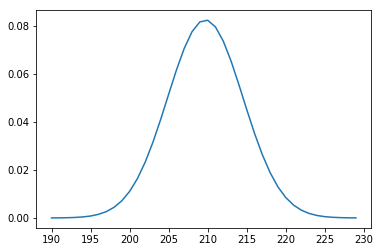

In [2]:
zs = range(190, 230)
ys = [p(z) for z in zs]

import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(zs, ys)
plt.show()

zsは横軸の数値のリスト，ysは縦軸の関数pの値のリストです．

さらに，$p$を積分して，センサ値が整数に限定される場合の確率分布を作ってみます．
センサ値$x$に対して，区間$[ x - 0.5, x + 0.5)$の範囲で積分することにします（ここでは台形公式で近似）．

/Users/hide/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/hide/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['ipaexg'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


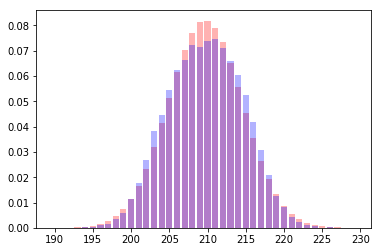

In [3]:
def prob(z, width = 0.5): 
    return width*(p(z - width) + p(z + width))

zs = range(190, 230)
ys = [prob(z) for z in zs]

import pandas as pd
data = pd.read_csv("sensor_data_200.txt", delimiter = " ",
                  header = None, names = ("data", "time", "ir", "lidar"))
freqs = pd.DataFrame(data["lidar"].value_counts())
freqs["probs"] = freqs["lidar"] / len(data["lidar"])

plt.bar(zs, ys, color = "red", alpha = 0.3) # Make graphs transparent with alpha
f = freqs["probs"].sort_index()
plt.bar(f.index, f.values, color = "blue", alpha = 0.3)
plt.show()

ガウス分布は$\mu$, $\sigma^{2}$を決めると形状が決まるので，式を記述する必要がなければ
<div style="text-align: center;">
$\mathcal{N}(z|\mu, \sigma^{2})$ \ あるいは $\mathcal{N}(\mu, \sigma^{2})$
</div>
などと略記します．

- モデル化：ある現象を説明するために適切な確率分布の数式を用いてパラメータを決めること
- 確率モデル：モデル化で分布に当てはめられる数式

ガウス分布の確率密度関数（probability density function, pdf）
<div style="text-align: center;">
$p(z) = \cfrac{1}{\sqrt{2\pi\sigma^{2}}}\exp \left\{ - \cfrac{(z - \mu)^{2}}{2 \sigma^{2}} \right\}$
</div>

- 確率密度関数は，積分すると確率になる関数
- 確率密度関数の値は密度と呼ばれる

ガウス分布などの確率密度関数を扱うにはSciPyが便利です．
このモジュール下にあるサブモジュールstatsにはガウス分布の確率密度関数norm.pdfが実装されています．

/Users/hide/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/hide/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['ipaexg'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


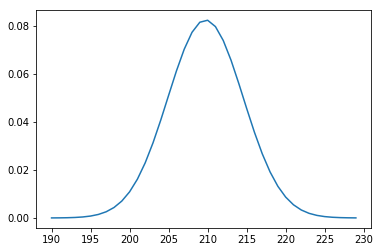

In [4]:
mean1 = sum(data["lidar"].values)/len(data["lidar"].values)

zs = data["lidar"].values
mean = sum(zs) / len (zs)
diff_square = [(z -mean)**2 for z in zs]
sampling_var = sum(diff_square)/(len(zs))
stddev1 = math.sqrt(sampling_var)

from scipy.stats import norm

zs = range(190, 230)
ys = [norm.pdf(z, mean1, stddev1) for z in zs]

plt.plot(zs, ys)
plt.show()

変数$z$が実数のとき，確率密度関数$p$を積分したものは累積分布関数（cumulated distribution function, cdf）と呼ばれます．
<div style="text-align: center;">
$p(z < a) = \int_{-\infty}^{a} p(z) dz$
</div>

/Users/hide/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['ipaexg'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


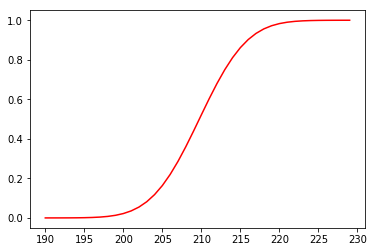

In [5]:
zs = range(190, 230)
ys = [norm.cdf(z, mean1, stddev1) for z in zs]

plt.plot(zs, ys, color = "red")
plt.show()

先に台形公式で近似計算を行なった下式の計算は，確率の計算に置き換えられます．
<div style="text-align: center;">
$P(a \leq z < b) = \int_{a}^{b} p(z) dz = \int_{-\infty}^{b} p(z) dz - \int_{-\infty}^{a} p(z) dz = P(z < b) -P(z < a)$
</div>
上式を使って確率分布を描くには以下のようにします．

/Users/hide/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['ipaexg'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


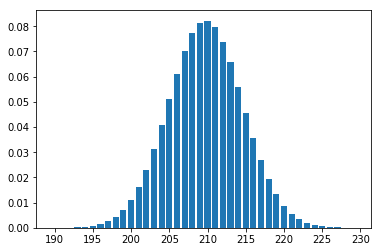

In [6]:
zs = range(190, 230)
ys = [norm.cdf(z + 0.5, mean1, stddev1) - norm.cdf(z - 0.5, mean1, stddev1) for z in zs]

plt.bar(zs, ys)
plt.show()

確率密度関数は，確率質量関数が大文字$P$で表記されるのに対して，多くの場合，区別のために小文字$p$と表記されます．